In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [4]:
all_tracks_df = pd.read_pickle("../../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except classical to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'classical', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

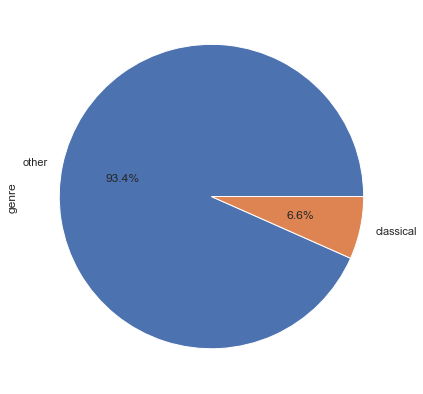

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other        6168
classical     439
Name: genre, dtype: int64

Resample data

In [8]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'classical'].sample(n=430, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=430, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0Ck1w9drSHl9NrWV9diIXv,classical,0.065076,0.004007,0.818182,0.093118,0.0,0.046875,0.998996,0.940937,0.057800,0.168834,0.247461,0.059201,0.75
6tmzIxHREnZzKSDMm6CNNS,classical,0.074837,0.008379,0.545455,0.355743,1.0,0.059322,0.991968,0.925662,0.073855,0.013731,0.207625,0.258914,0.75
25a3vqnGG9UnJw6YewzZLI,classical,0.361171,0.265882,0.363636,0.522854,1.0,0.030191,0.957831,0.974542,0.075513,0.499636,0.489795,0.106311,1.00
1t4F79zRBJTwZAzmbO1LI0,classical,0.048807,0.226769,0.272727,0.637180,1.0,0.063030,0.880522,0.751527,0.101927,0.016020,0.104584,0.398660,0.75
2D4Tev0Eg3gbqepUiHnDKd,classical,0.136659,0.003214,0.818182,0.130092,0.0,0.048464,0.969879,0.178208,0.184794,0.054093,0.157561,0.092366,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1MtUq6Wp1eQ8PC6BbPCj8P,other,0.654013,0.715178,0.636364,0.830694,0.0,0.234640,0.035439,0.000009,0.073234,0.713929,0.353949,0.075621,0.75
2rbcCco3PrSyMinVJdh61J,other,0.465293,0.855583,0.636364,0.811793,1.0,0.048464,0.000256,0.000748,0.295629,0.436180,0.532318,0.182567,0.75
3m8CQnnfJJp4eQMWWl3zay,other,0.422993,0.632941,0.727273,0.800797,0.0,0.727225,0.011443,0.000000,0.191009,0.218766,0.537409,0.108889,0.75
1Xo5IcDLNOEpcB1RM4mBNF,other,0.440347,0.858592,0.636364,0.830359,1.0,0.037606,0.006764,0.000398,0.452041,0.220847,0.407537,0.142002,0.75


<AxesSubplot:ylabel='genre'>

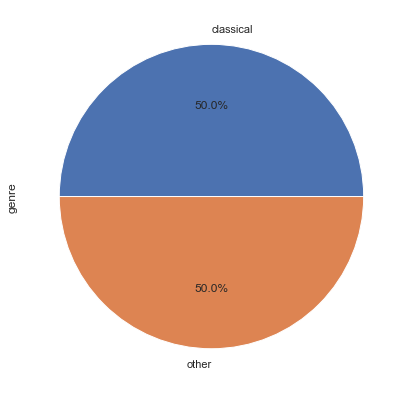

In [9]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [10]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.411631,0.368547,0.477061,0.631306,0.639535,0.132538,0.588657,0.352484,0.146323,0.329018,0.405663,0.168599,0.695640
std,0.255972,0.313561,0.324136,0.209157,0.480415,0.183101,0.406289,0.407744,0.121861,0.283723,0.181735,0.139721,0.147332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002383,0.000007,0.000000,0.009115,0.000000,0.000000,0.018932,0.000000
25%,0.174620,0.075608,0.181818,0.465954,0.000000,0.044492,0.127507,0.000004,0.077766,0.054275,0.253176,0.079850,0.750000
50%,0.394252,0.270395,0.454545,0.638736,1.000000,0.060381,0.797188,0.039969,0.099855,0.271299,0.382369,0.122329,0.750000
75%,0.625542,0.653250,0.727273,0.830806,1.000000,0.105469,0.975904,0.850815,0.162782,0.555810,0.524227,0.199739,0.750000
max,0.949024,0.988968,1.000000,0.953799,1.000000,0.986758,1.000000,1.000000,0.868448,0.987517,0.958147,1.000000,1.000000


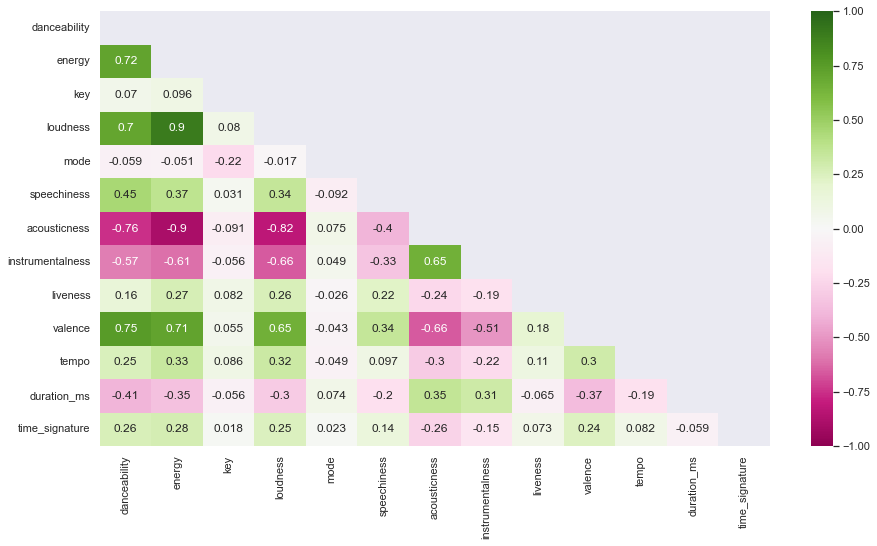

In [11]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

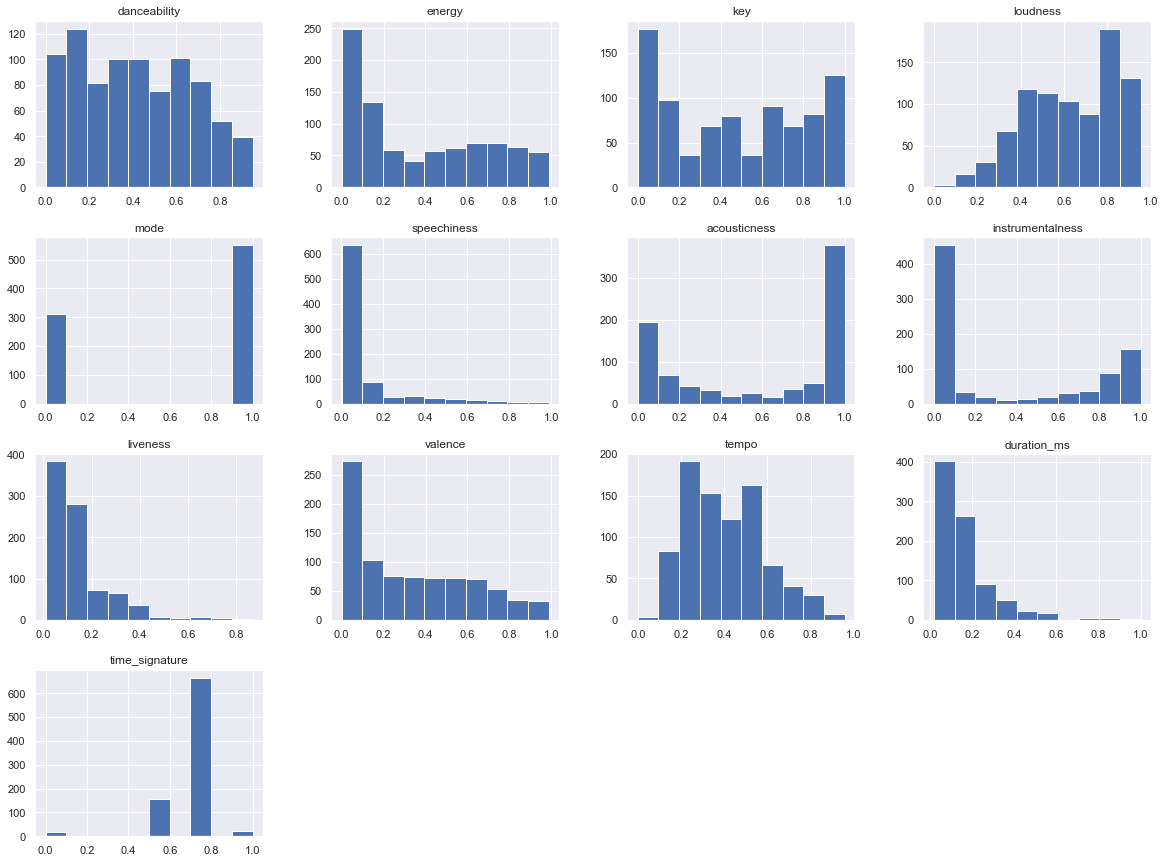

In [12]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [13]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [15]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


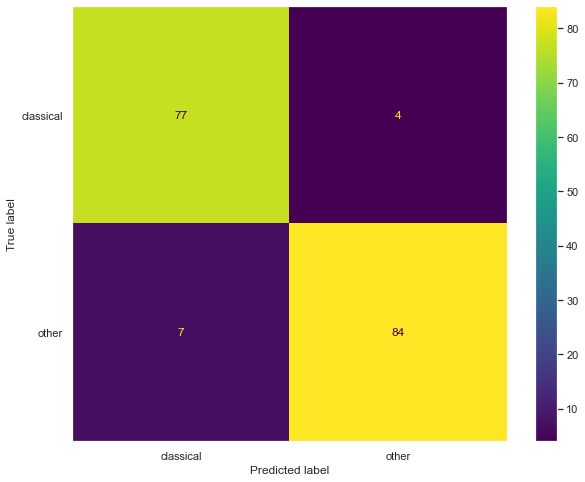

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [17]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

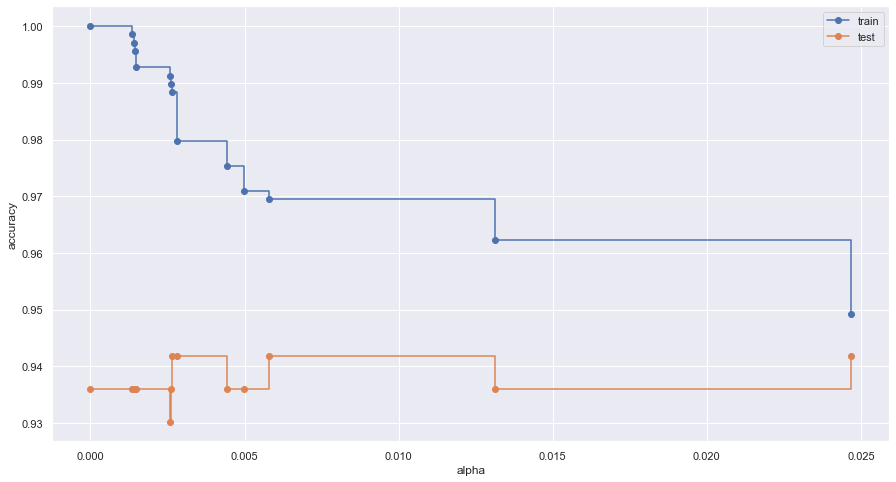

In [18]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [19]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.0026427061310782245

Cross Validation

<AxesSubplot:xlabel='tree'>

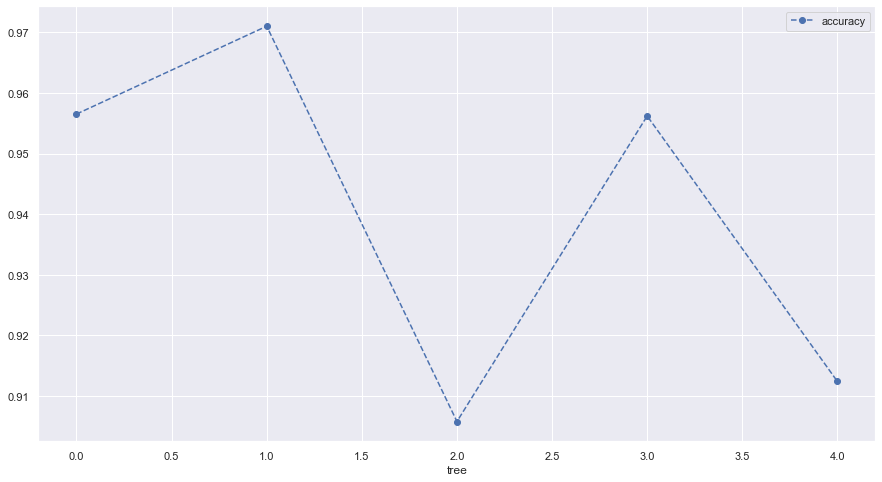

In [20]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

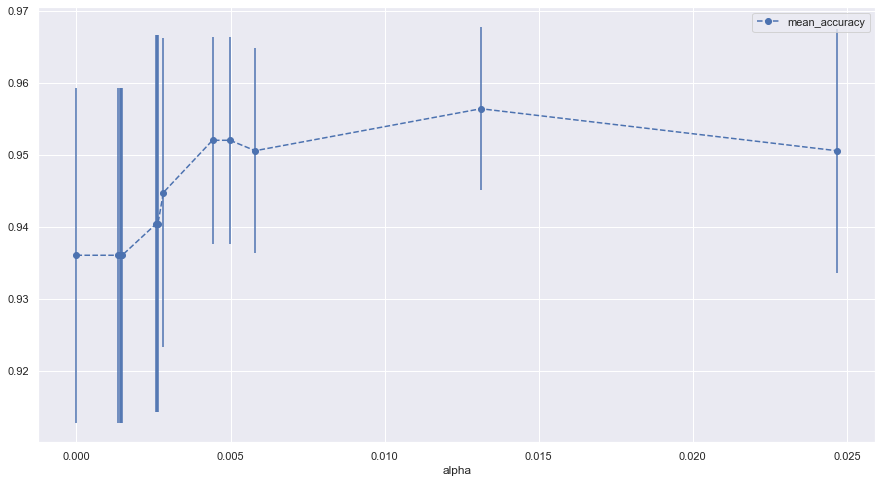

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [22]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.013124289644117125

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


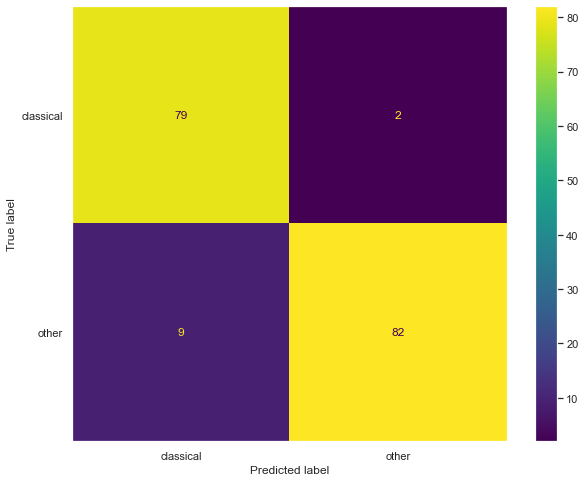

In [23]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

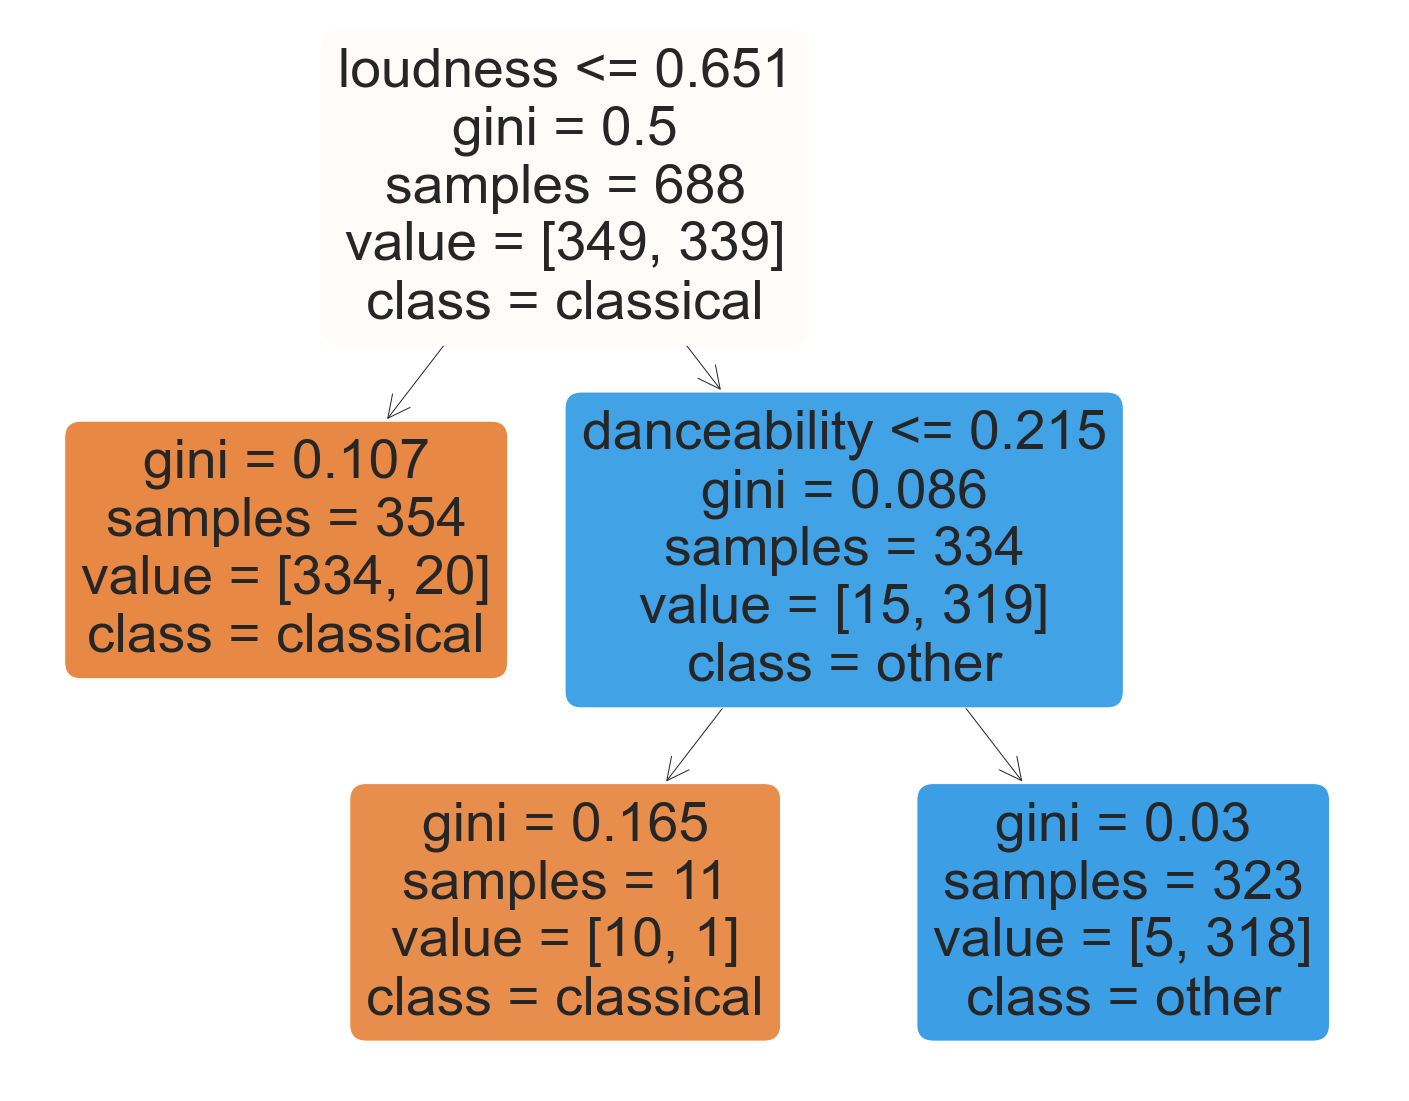

In [24]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [27]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'classical', 'genre'] = 0
df.loc[df['genre'] == 'classical', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=430, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=430, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0Ck1w9drSHl9NrWV9diIXv,1,0.121,0.00488,9,-39.580,0,0.0401,0.995000,0.924000,0.0694,0.1860,84.021,181040,4
6tmzIxHREnZzKSDMm6CNNS,1,0.130,0.00924,6,-27.853,1,0.0448,0.988000,0.909000,0.0849,0.0369,77.307,386507,4
25a3vqnGG9UnJw6YewzZLI,1,0.394,0.26600,4,-20.391,1,0.0338,0.954000,0.957000,0.0865,0.5040,124.865,229507,5
1t4F79zRBJTwZAzmbO1LI0,1,0.106,0.22700,3,-15.286,1,0.0462,0.877000,0.738000,0.1120,0.0391,59.940,530280,4
2D4Tev0Eg3gbqepUiHnDKd,1,0.187,0.00409,9,-37.929,0,0.0407,0.966000,0.175000,0.1920,0.0757,68.869,215160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1MtUq6Wp1eQ8PC6BbPCj8P,0,0.664,0.71400,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.7100,101.969,197933,4
2rbcCco3PrSyMinVJdh61J,0,0.490,0.85400,7,-7.489,1,0.0407,0.000258,0.000735,0.2990,0.4430,132.032,307960,4
3m8CQnnfJJp4eQMWWl3zay,0,0.451,0.63200,8,-7.980,0,0.2970,0.011400,0.000000,0.1980,0.2340,132.890,232160,4
1Xo5IcDLNOEpcB1RM4mBNF,0,0.467,0.85700,7,-6.660,1,0.0366,0.006740,0.000391,0.4500,0.2360,111.001,266227,4


In [28]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.078979
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                  688
Model:                          Logit   Df Residuals:                      675
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.8860
Time:                        15:22:26   Log-Likelihood:                -54.338
converged:                       True   LL-Null:                       -476.81
Covariance Type:            nonrobust   LLR p-value:                3.771e-173
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability       -15.4657      2.784     -5.555      0.000     -20.923     -10.009
energy               0.9459      2.778      0.341      0.733      -4.498       6.390
key                 -0.0382      0.083     -0.458      0.647      -0.202       0.125
loudness            -0.2458      0.073     -3.390      0.001      -0.388      -0.104
mode                 0.4038      0.580      0.697      0.486      -0.732       1.540
speechiness         -6.6496      8.272     -0.804      0.421     -22.862       9.563
acousticness         7.4630      1.676      4.453      0.000       4.178      10.748
instrumentalness    -1.1374      0.819     -1.390      0.165      -2.742       0.467
liveness            -0.1529      2.923     -0.052      0.958      -5.881       5.576
valence              3.7897      1.786      2.122      0.034       0.289       7.291
tempo               -0.0138      0.009     -1.598      0.110      -0.031       0.003
duration_ms       3.547e-06   2.64e-06      1.346      0.178   -1.62e-06    8.71e-06
time_signature      -0.8489      0.422     -2.010      0.044      -1.677      -0.021
====================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""